# Team as an entity model

This model is a

In [1]:
# Import
from torch import nn
from torch.utils.data import DataLoader, random_split

from models.models import *
from datasets.datasets import *
from utils import *

In [2]:
# Meta
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Dataset

In [3]:
file = './Data/team/processed/team_data.xlsx'
dataset = get_team_dataset(file)

# Dataloader

In [4]:
batch_size = 100
test_length = len(dataset)//10
train_length = len(dataset) - test_length

print(test_length)
print(train_length)
dataset_test, dataset_train = random_split(dataset, [test_length, train_length])


# Must generate batches of sequence data with the following format:
# (batch_size, num_seasons(N), input_size(num stats))
# (https://stackoverflow.com/questions/49466894/how-to-correctly-give-inputs-to-embedding-lstm-and-linear-layers-in-pytorch/49473068#49473068)
dataloader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
dataloader_test = DataLoader(dataset_test, batch_size=batch_size, shuffle=True)

print(dataset_train.__getitem__(0))

63
574
(tensor([[0.6830, 2.9900, 2.6300],
        [0.5490, 2.5500, 2.7200],
        [0.5000, 2.5900, 2.9300],
        [0.2930, 2.0100, 3.3700],
        [0.5790, 3.1100, 2.8800]]), tensor([0.5490, 3.1500, 2.9800]))


# Models

In [5]:
input_size = len(dataset_train.__getitem__(0)[0][0])
hidden_size = 50
#model = TeamAsEntity(input_size=input_size, hidden_size=hidden_size, device=device).to(device)

"""
Hidden Layers Size Exploration
"""
hidden_sizes = [50, 100, 200]


"""
Stacked LSTM Exploration
"""
num_layerss = [1,2,3]

# Training and Validation

In [6]:
criterion = RMSELoss()
opt = torch.optim.Adam
epochs = 1500
loss_interval = 25

In [7]:
results = []

for hidden_size in hidden_sizes:
    for num_layers in num_layerss:

        print("\n####################")
        print(f"Model: {hidden_size}_{num_layers}")
        print("####################\n")

        model = TeamAsEntity(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, device=device).to(device)
        optimizer = opt(model.parameters(),lr=0.0001)
        
        res = train_and_validate(model, criterion, optimizer, dataloader_train, dataloader_test, epochs=epochs, loss_interval=loss_interval, device=device)
        results.append([(hidden_size,num_layers), res])


####################
Model: 50_1
####################

Validation loss for epoch 0: [2.119821548461914]
Validation loss for epoch 25: [1.0773494243621826]
Validation loss for epoch 50: [0.8247585296630859]
Validation loss for epoch 75: [0.6613538265228271]
Validation loss for epoch 100: [0.5250433683395386]
Validation loss for epoch 125: [0.4199964702129364]
Validation loss for epoch 150: [0.35582515597343445]
Validation loss for epoch 175: [0.32929426431655884]
Validation loss for epoch 200: [0.32241377234458923]
Validation loss for epoch 225: [0.3214876651763916]
Validation loss for epoch 250: [0.32162684202194214]
Validation loss for epoch 275: [0.32178211212158203]
Validation loss for epoch 300: [0.3218347430229187]
Validation loss for epoch 325: [0.32184943556785583]
Validation loss for epoch 350: [0.321842223405838]
Validation loss for epoch 375: [0.32184502482414246]
Validation loss for epoch 400: [0.3218744695186615]
Validation loss for epoch 425: [0.32185330986976624]
Validat

# Plot Results

[(50, 1), (TeamAsEntity(
  (lstm): LSTM(3, 50, batch_first=True)
  (mid): Sequential(
    (0): Linear(in_features=50, out_features=200, bias=True)
    (1): Tanh()
    (2): Linear(in_features=200, out_features=12, bias=True)
    (3): Tanh()
  )
  (out): Linear(in_features=12, out_features=3, bias=True)
), [2.11114501953125, 1.1248048543930054, 0.867358922958374, 0.6410223245620728, 0.5164850950241089, 0.4303016662597656, 0.36312007904052734, 0.32792672514915466, 0.35896220803260803, 0.3184824287891388, 0.2976670265197754, 0.3006931245326996, 0.3059071898460388, 0.3176144063472748, 0.3333725929260254, 0.30416008830070496, 0.3156452775001526, 0.27824440598487854, 0.30548742413520813, 0.333980530500412, 0.3349428176879883, 0.30561092495918274, 0.333761602640152, 0.287723183631897, 0.3217295706272125, 0.3146878480911255, 0.31789061427116394, 0.3078920245170593, 0.3179381787776947, 0.31550684571266174, 0.3037567138671875, 0.32165035605430603, 0.2832488715648651, 0.2788577079772949, 0.2559003

ValueError: x and y must have same first dimension, but have shapes (60,) and (1,)

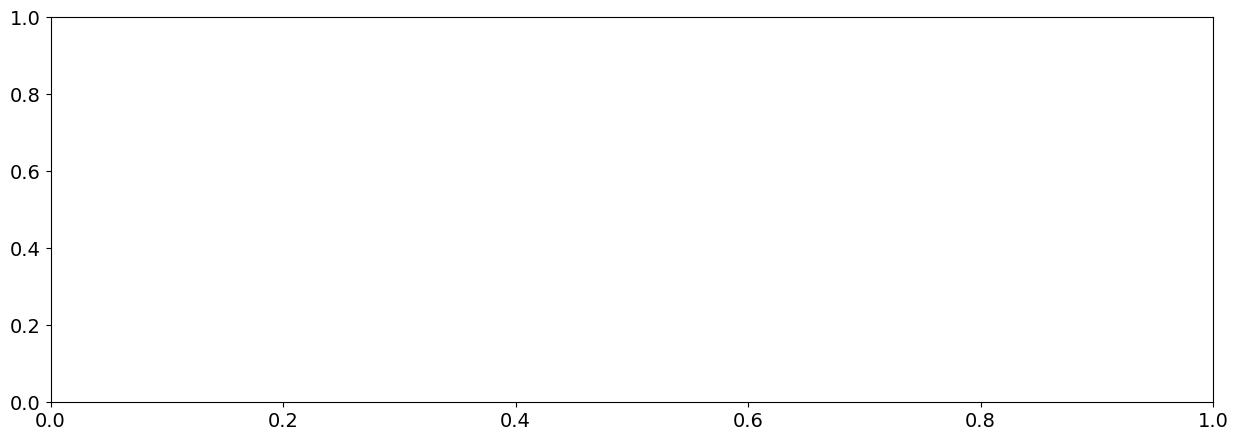

In [9]:
for res in  results:
    plot_train_v_loss(f"team-as-entity-{res[0][0]}-{res[0][1]}", res[1][1], res[1][2], loss_interval)